# 모듈 및 데이터 로딩

In [1]:
# %pip install -r ../requirements.txt
import string

import matplotlib.pyplot as plt

In [2]:
with open("yoon.txt", encoding="utf-8") as f:
    text = f.read()

In [3]:
text[:100]

'존경하는 하원의장님, 부통령님, 상·하원 의원 여러분과 내외 귀빈 여러분, 미국 시민 여러분. "자유 속에 잉태된 나라, 인간은 모두 평등하게 창조되었다는 신념에 의해 세워진 나라'

In [4]:
text = text.replace("\n", " ").replace("  ", " ")

In [5]:
# def remove_punc(x):
#     new_s = []
#     for i in x:
#         if i not in string.punctuation:
#             new_s.append(i)
#     new_s = ''.join(new_s)
#     return new_s

In [6]:
# 위 함수 대신 List Comprehension으로 만들어보기
text = ''.join([i for i in text if i not in string.punctuation])

In [7]:
text[:100]

'존경하는 하원의장님 부통령님 상·하원 의원 여러분과 내외 귀빈 여러분 미국 시민 여러분 자유 속에 잉태된 나라 인간은 모두 평등하게 창조되었다는 신념에 의해 세워진 나라 저는 지금'

# 단어 등장 빈도 확인하기

In [8]:
# 모든 단어를 하나의 리스트로 통합하기
word_split = text.split(" ")
word_split[:100]

['존경하는',
 '하원의장님',
 '부통령님',
 '상·하원',
 '의원',
 '여러분과',
 '내외',
 '귀빈',
 '여러분',
 '미국',
 '시민',
 '여러분',
 '자유',
 '속에',
 '잉태된',
 '나라',
 '인간은',
 '모두',
 '평등하게',
 '창조되었다는',
 '신념에',
 '의해',
 '세워진',
 '나라',
 '저는',
 '지금',
 '자유에',
 '대한',
 '확신',
 '동맹에',
 '대한',
 '신뢰',
 '새로운',
 '미래를',
 '열고자',
 '하는',
 '결의를',
 '갖고',
 '미국',
 '국민',
 '앞에',
 '서',
 '있습니다',
 '미',
 '의회는',
 '234년',
 '동안',
 '자유와',
 '민주주의의',
 '상징이었습니다',
 '미',
 '헌법',
 '정신을',
 '구현하고',
 '있는',
 '바로',
 '이곳에서',
 '의원',
 '여러분과',
 '미국',
 '국민',
 '앞에',
 '연설하게',
 '되어',
 '매우',
 '기쁘게',
 '생각합니다',
 '특히',
 '한미동맹',
 '70주년',
 '결의를',
 '채택하여',
 '이번',
 '저의',
 '방문의',
 '의미를',
 '더욱',
 '빛내주신',
 '민주당과',
 '공화당',
 '양당',
 '의원',
 '여러분께도',
 '깊은',
 '감사의',
 '말씀을',
 '드립니다',
 '특히',
 '한미동맹',
 '70주년',
 '결의를',
 '채택하여',
 '이번',
 '저의',
 '방문의',
 '의미를',
 '더욱',
 '빛내주신',
 '민주당과',
 '공화당']

In [9]:
len(word_split)

2056

In [10]:
stop_words = ["있습니다", "것입니다", "합니다", "그리고", "이", "두", "수", "전", "그", "미", "등"]

In [11]:
word_split = [i for i in word_split if i not in stop_words]

In [12]:
len(word_split)

1947

In [13]:
from nltk.probability import FreqDist

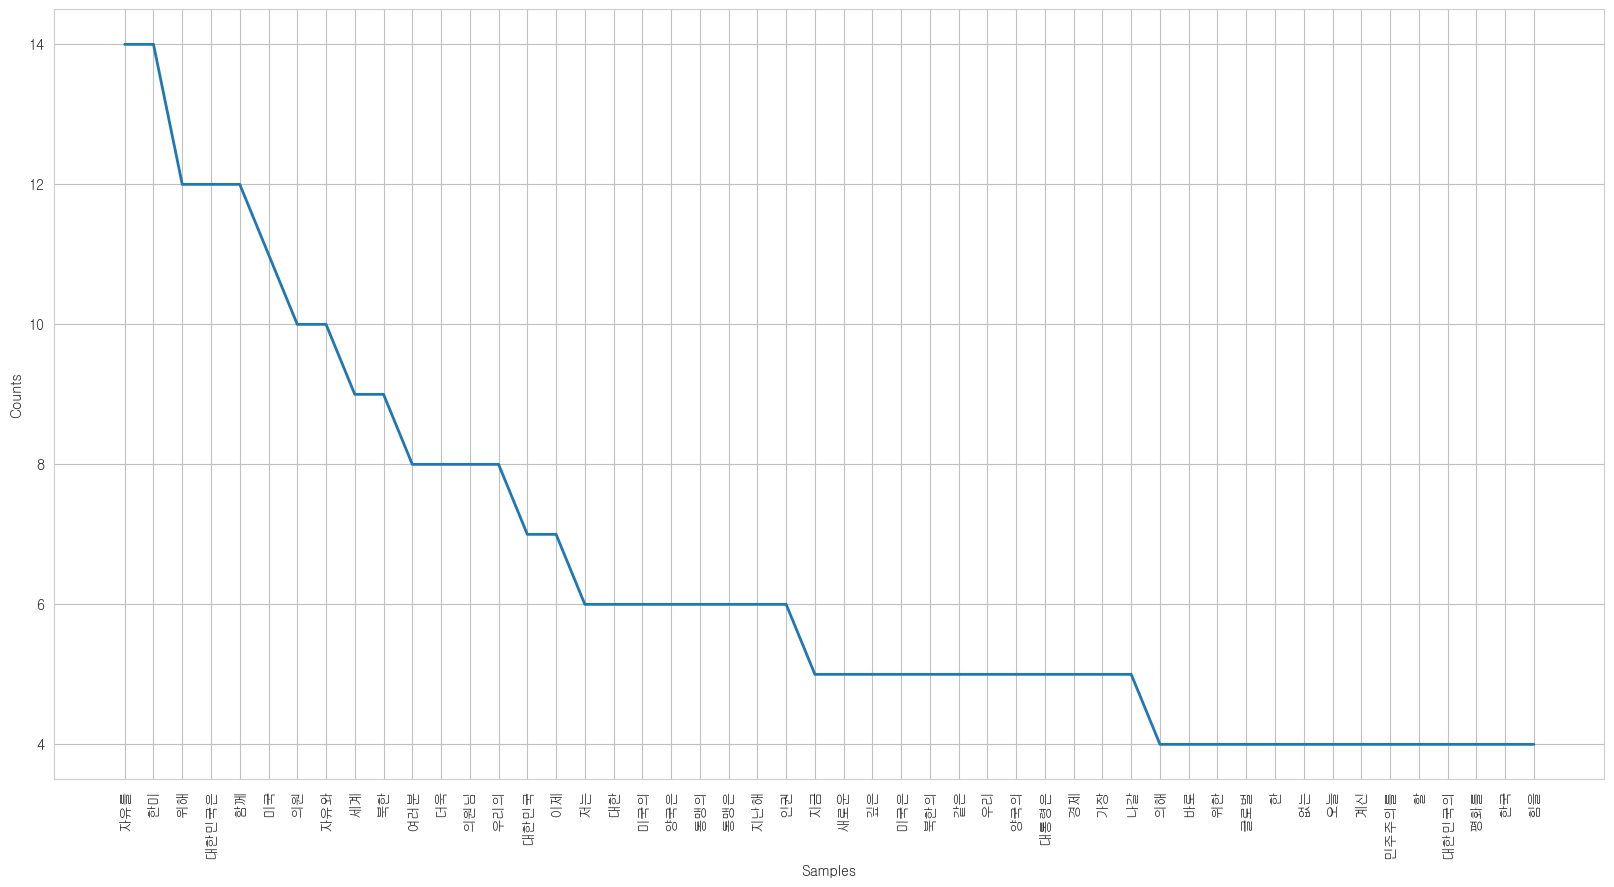

<Axes: xlabel='Samples', ylabel='Counts'>

In [14]:
import matplotlib as mpl

mpl.rcParams['font.family'] = 'Gulim'  # 굴림체 적용
plt.figure(figsize=(20, 10))
FreqDist(word_split).plot(50)

# Word Cloud 만들기

In [15]:
from wordcloud import WordCloud

In [16]:
word_split = str(word_split)[3:].replace("', '", " ").replace("을", "").replace("를", "").replace("의", "").replace("은",
                                                                                                                 "")

(-0.5, 1599.5, 1599.5, -0.5)

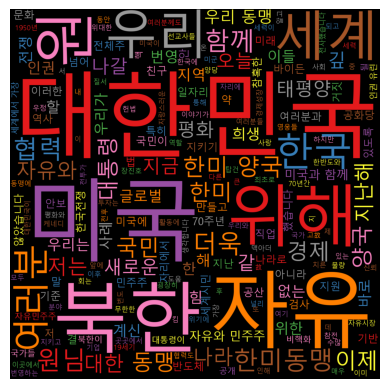

In [17]:
# wc = WordCloud().generate(str(word_split))  # 가장 간단히
# plt.figure(figsize=(10, 5))
# mpl.rcParams['font.family'] = 'Gulim'  # 굴림체 적용
# plt.imshow(wc)
# plt.axis('off')

wc = WordCloud(font_path='malgun', width=800, height=800, scale=2.0, max_font_size=250, colormap="Set1")
gen = wc.generate(str(word_split))
plt.imshow(gen)
plt.axis('off')

In [18]:
from PIL import Image

image_file = Image.open("KOREA.png")  # open colour image
image_file = image_file.convert('1')  # convert image to black and white
image_file.save('korea_b&w.png')

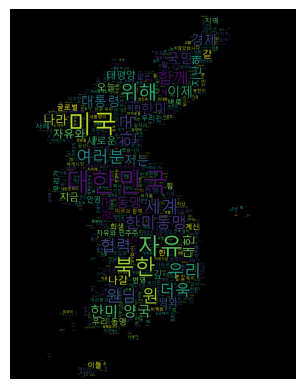

In [19]:
from PIL import Image
import numpy as np

korea_mask = np.array(Image.open("korea.png"))

# wc = WordCloud(font_path='malgun', width=800, height=800, scale=2.0, max_font_size=250, colormap="Set1")
# gen = wc.generate(str(word_split))
# plt.imshow(gen)
# plt.axis('off')
wc = WordCloud(font_path='malgun', background_color="black", max_words=2000, mask=korea_mask, width=1486)
# background_color="white", max_words=2000, contour_width=1, contour_color='steelblue', width=1920, height=1080)
gen = wc.generate(word_split)

# 파일로 저장
wc.to_file("korea_wordcloud.png")

# show
plt.axis("off")
plt.imshow(wc, cmap=plt.cm.gray)
# plt.imshow(wc, cmap=plt.cm.gray, interpolation='bilinear')
# plt.imshow(wc, interpolation='bilinear')